# Exploratory Data Analysis - Customer Lifetime Value Prediction

This notebook explores the customer transaction data to understand patterns and relationships that will inform our CLV prediction model.


In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Change to project root directory (two levels up from notebooks/)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if os.path.exists(os.path.join(project_root, 'src')):
    os.chdir(project_root)
    sys.path.insert(0, project_root)
else:
    # If already in project root, just add current directory
    sys.path.insert(0, os.getcwd())

print(f"Working directory: {os.getcwd()}")
print(f"Project root: {project_root}")

from src.data_loader import load_transactions, load_customers, load_clv_data

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

%matplotlib inline


Working directory: C:\projects\pdf_resuem\customer_lifetime_value_prediction
Project root: C:\projects\pdf_resuem


## 1. Load Data


In [7]:
# Load datasets
transactions = load_transactions()
customers = load_customers()
clv_data = load_clv_data()

print(f"Transactions: {len(transactions):,} rows")
print(f"Customers: {len(customers):,} rows")
print(f"CLV Data: {len(clv_data):,} rows")


Transactions: 36,858 rows
Customers: 10,000 rows
CLV Data: 10,000 rows


## 2. Data Overview


In [8]:
# Transaction statistics
print("Transaction Data Overview:")
print(transactions.describe())
print("\n" + "="*50)
print("\nCLV Data Overview:")
print(clv_data.describe())


Transaction Data Overview:
        customer_id                     order_date   order_value  \
count  36858.000000                          36858  36858.000000   
mean    4969.931114  2023-10-01 19:28:16.565196032    154.801598   
min        1.000000            2022-01-04 00:00:00     16.000000   
25%     2472.000000            2023-03-29 00:00:00     95.013750   
50%     4956.000000            2023-10-21 00:00:00    138.761250   
75%     7475.000000            2024-04-17 00:00:00    197.379000   
max    10000.000000            2024-12-31 00:00:00    688.800000   
std     2891.938201                            NaN     82.641097   

           quantity      discount           age  
count  36858.000000  36858.000000  36858.000000  
mean       2.990721      0.074586     46.396006  
min        1.000000      0.000000     18.000000  
25%        2.000000      0.000000     31.000000  
50%        3.000000      0.100000     47.000000  
75%        4.000000      0.150000     61.000000  
max       

## 3. Distribution Analysis


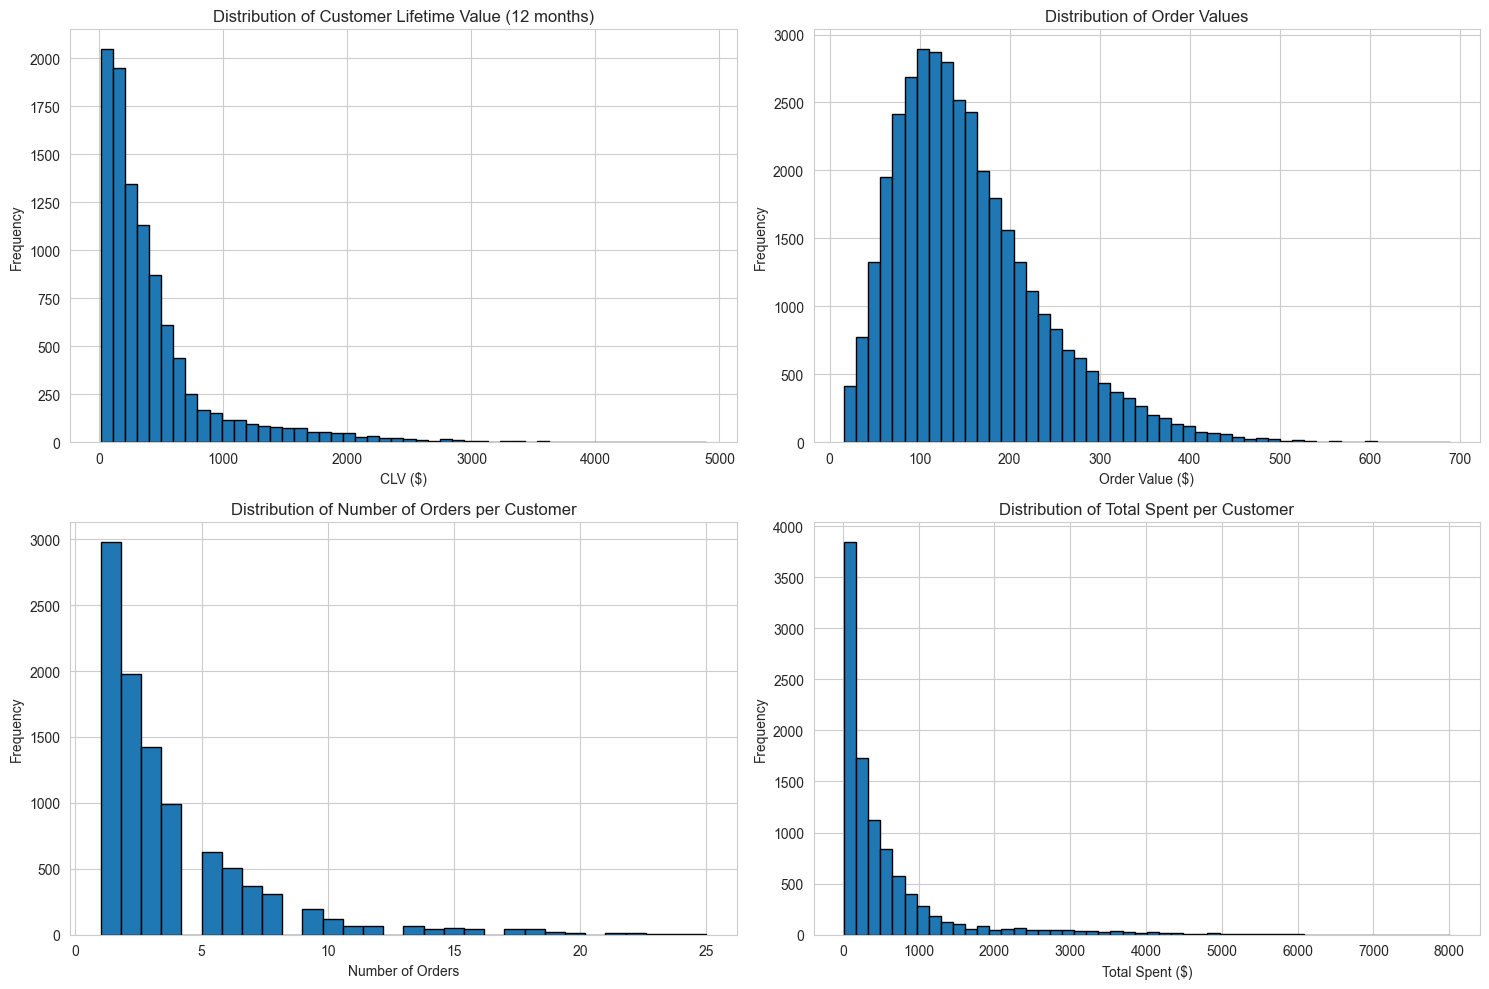

In [9]:
# Create results directory if it doesn't exist
os.makedirs('results/figures', exist_ok=True)

# CLV Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# CLV Distribution
axes[0, 0].hist(clv_data['clv_12months'], bins=50, edgecolor='black')
axes[0, 0].set_title('Distribution of Customer Lifetime Value (12 months)')
axes[0, 0].set_xlabel('CLV ($)')
axes[0, 0].set_ylabel('Frequency')

# Order Value Distribution
axes[0, 1].hist(transactions['order_value'], bins=50, edgecolor='black')
axes[0, 1].set_title('Distribution of Order Values')
axes[0, 1].set_xlabel('Order Value ($)')
axes[0, 1].set_ylabel('Frequency')

# Number of Orders per Customer
axes[1, 0].hist(clv_data['num_orders'], bins=30, edgecolor='black')
axes[1, 0].set_title('Distribution of Number of Orders per Customer')
axes[1, 0].set_xlabel('Number of Orders')
axes[1, 0].set_ylabel('Frequency')

# Total Spent Distribution
axes[1, 1].hist(clv_data['total_spent'], bins=50, edgecolor='black')
axes[1, 1].set_title('Distribution of Total Spent per Customer')
axes[1, 1].set_xlabel('Total Spent ($)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('results/figures/distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


## 4. Correlation Analysis


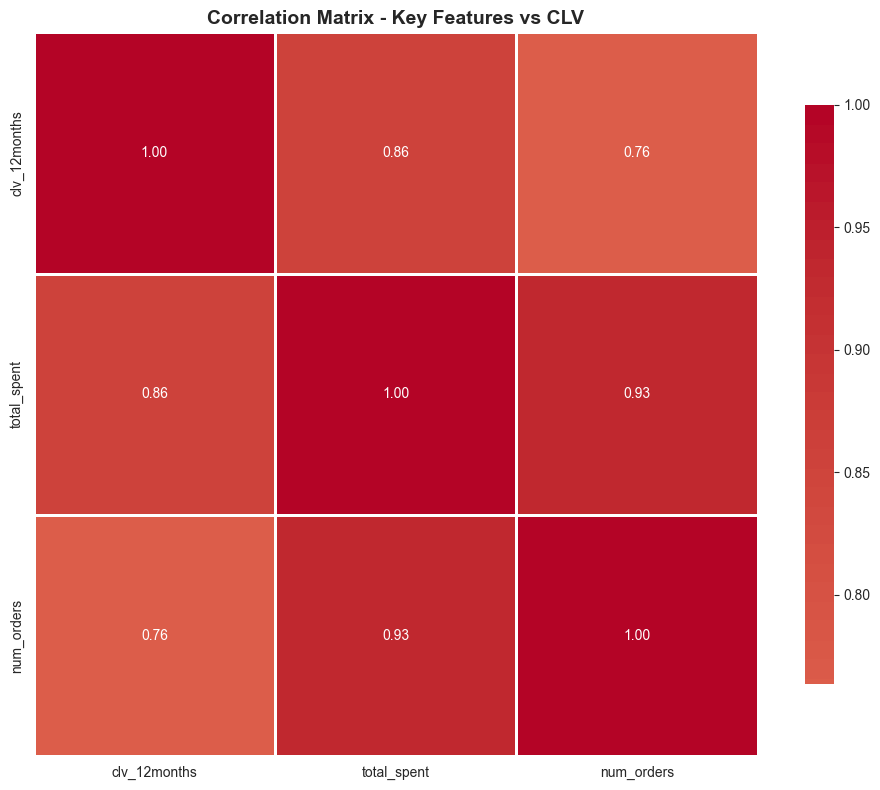

In [10]:
# Calculate correlations
corr_cols = ['clv_12months', 'total_spent', 'num_orders']
if 'avg_order_value' in clv_data.columns:
    corr_cols.append('avg_order_value')
if 'days_since_first_purchase' in clv_data.columns:
    corr_cols.extend(['days_since_first_purchase'])

available_cols = [col for col in corr_cols if col in clv_data.columns]
corr_matrix = clv_data[available_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Key Features vs CLV', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('results/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Customer Segment Analysis


CLV Statistics by Segment:
                mean       median         std  count
segment                                             
At-Risk   173.577228    98.200630  218.802885   2065
New       215.627848   152.757541  222.083669   2985
Regular   457.258380   406.480629  280.128872   3989
VIP      1616.766462  1515.227576  643.808749    961


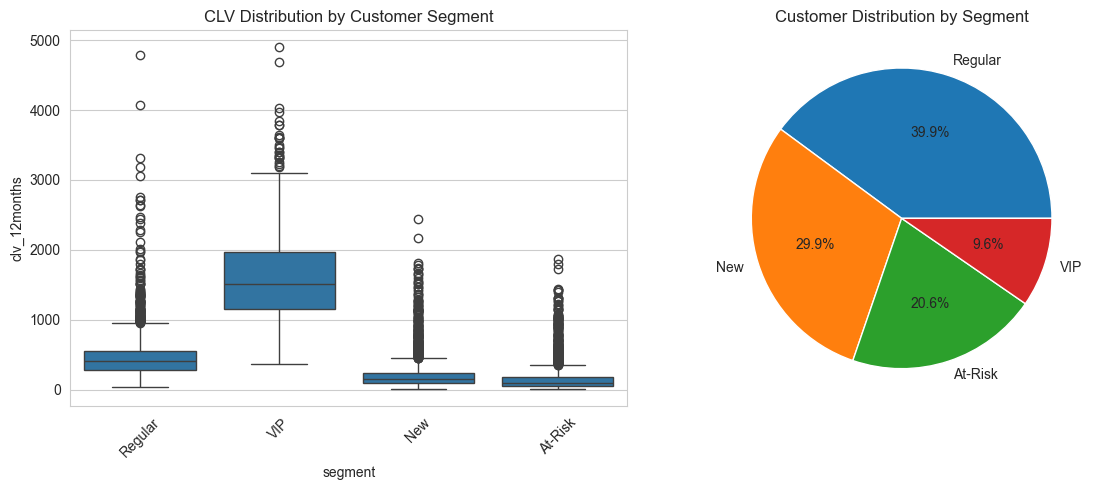

In [11]:
if 'segment' in clv_data.columns:
    # CLV by Customer Segment
    segment_clv = clv_data.groupby('segment')['clv_12months'].agg(['mean', 'median', 'std', 'count'])
    print("CLV Statistics by Segment:")
    print(segment_clv)
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(data=clv_data, x='segment', y='clv_12months')
    plt.title('CLV Distribution by Customer Segment')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    segment_counts = clv_data['segment'].value_counts()
    plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
    plt.title('Customer Distribution by Segment')
    
    plt.tight_layout()
    plt.savefig('results/figures/segment_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()


## 6. Key Insights Summary


In [12]:
print("="*60)
print("KEY INSIGHTS")
print("="*60)
print(f"\n1. Average CLV (12 months): ${clv_data['clv_12months'].mean():.2f}")
print(f"2. Median CLV: ${clv_data['clv_12months'].median():.2f}")
print(f"3. Total Revenue: ${clv_data['total_spent'].sum():,.2f}")
print(f"4. Average Orders per Customer: {clv_data['num_orders'].mean():.2f}")
print(f"5. Average Order Value: ${transactions['order_value'].mean():.2f}")
if len(available_cols) > 1:
    print(f"\n6. Strongest CLV Correlations:")
    correlations = clv_data[available_cols].corr()['clv_12months'].sort_values(ascending=False)
    for feature, corr in correlations.items():
        if feature != 'clv_12months':
            print(f"   - {feature}: {corr:.3f}")


KEY INSIGHTS

1. Average CLV (12 months): $437.98
2. Median CLV: $274.61
3. Total Revenue: $5,705,677.29
4. Average Orders per Customer: 3.69
5. Average Order Value: $154.80

6. Strongest CLV Correlations:
   - total_spent: 0.858
   - num_orders: 0.764
